<a href="https://colab.research.google.com/github/bugf1nd3r/colab-python-scripts/blob/main/Mean_Reversion_Trading_Strategy_Using_Python-onescript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/ranaroussi/yfinance
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import Formatter, FixedLocator
plt.style.use('fivethirtyeight')
import yfinance as yf
import datetime
import pkg_resources 
#pkg_resources.require("seaborn==0.11.0")  # modified to use specific seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# GET the data
# Nifty : ^NSEI 
# BaniNifty : ^NSEBANK
data = yf.download("^NSEI",period="YTD",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# read the data
df = data
# show the data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,36421.898438,219000
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300
...,...,...,...,...,...,...
2022-06-10,34686.949219,34752.449219,34346.648438,34483.800781,34483.800781,90000
2022-06-13,33728.648438,33774.050781,33210.351562,33405.851562,33405.851562,131900
2022-06-14,33180.601562,33618.148438,33123.898438,33311.351562,33311.351562,113200


In [ ]:
# create a function to calculate the simple moving average

def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window=period).mean()
  

In [ ]:
# Build and show the data set

df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']

#Show the data
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,36421.898438,219000,NaN,NaN,NaN,NaN
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,36840.148438,190500,NaN,0.011483,0.011418,NaN
2022-01-05,36943.550781,37862.398438,36756.351562,37695.898438,37695.898438,237400,NaN,0.023229,0.022963,NaN
2022-01-06,37242.550781,37752.500000,37058.449219,37490.250000,37490.250000,199000,NaN,-0.005455,-0.005470,NaN
2022-01-07,37667.050781,38134.851562,37427.800781,37739.601562,37739.601562,183300,NaN,0.006651,0.006629,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-10,34686.949219,34752.449219,34346.648438,34483.800781,34483.800781,90000,34714.642485,-0.017148,-0.017297,0.993350
2022-06-13,33728.648438,33774.050781,33210.351562,33405.851562,33405.851562,131900,34728.190104,-0.031260,-0.031759,0.961923
2022-06-14,33180.601562,33618.148438,33123.898438,33311.351562,33311.351562,113200,34714.559152,-0.002829,-0.002833,0.959579


In [ ]:
# get some statistics on the ratio column
df['Ratios'].describe()

count    93.000000
mean      0.990003
std       0.037301
min       0.888384
25%       0.961645
50%       0.989430
75%       1.019013
max       1.088626
Name: Ratios, dtype: float64

In [ ]:
# get and show the percentile values
percentiles = [15, 20, 50, 80, 85]

# remove the na values in ration column and store the result in a new variable called ratios

ratios = df['Ratios'].dropna()
#get the values of the percentiles
percentiles_values =  np.percentile(ratios, percentiles)

#show the values of percentils

percentiles_values



array([0.94910777, 0.95752413, 0.98942963, 1.02088972, 1.02896289])

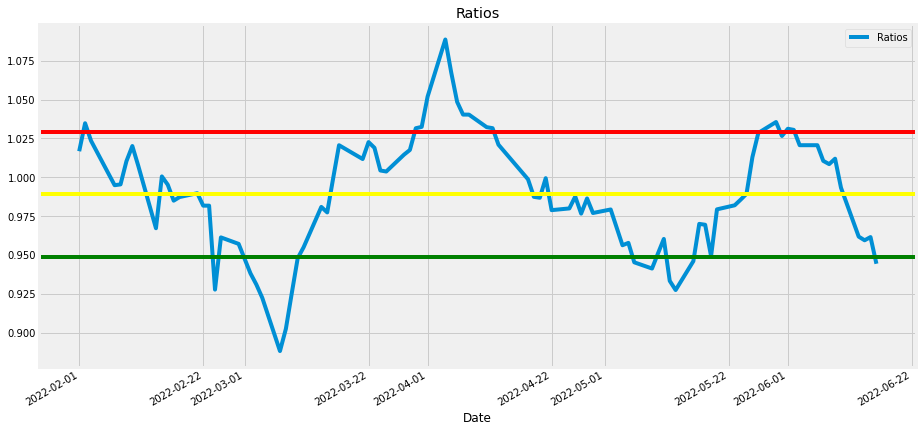

In [ ]:
# plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend = True)
plt.axhline(percentiles_values[0], c='green', label = '15th percentile')
plt.axhline(percentiles_values[2], c='yellow', label = '50th percentile')
plt.axhline(percentiles_values[-1], c='red', label = '85th percentile')
#plt.gcf().autofmt_xdate()




In [ ]:
#create buy and sell signal for the strategy
sell = percentiles_values[-1] #85th percentiles threshold where we want to sell
buy = percentiles_values[0] # 15th percentiles threshold where we want to buy

#put -1 where the ratio is greater than the percentile to sell and nan otherwise
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)
#put 1 where the ratio is less than the percentile to buy and put current values otherwise
df['Positions'] = np.where(df.Ratios < sell, 1, df['Positions'])

#use ffill fill to the missing values  in the data frame. ffill stands for forward fill

df['Positions'] = df['Positions'].ffill()

#get the buy and sell signal

df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

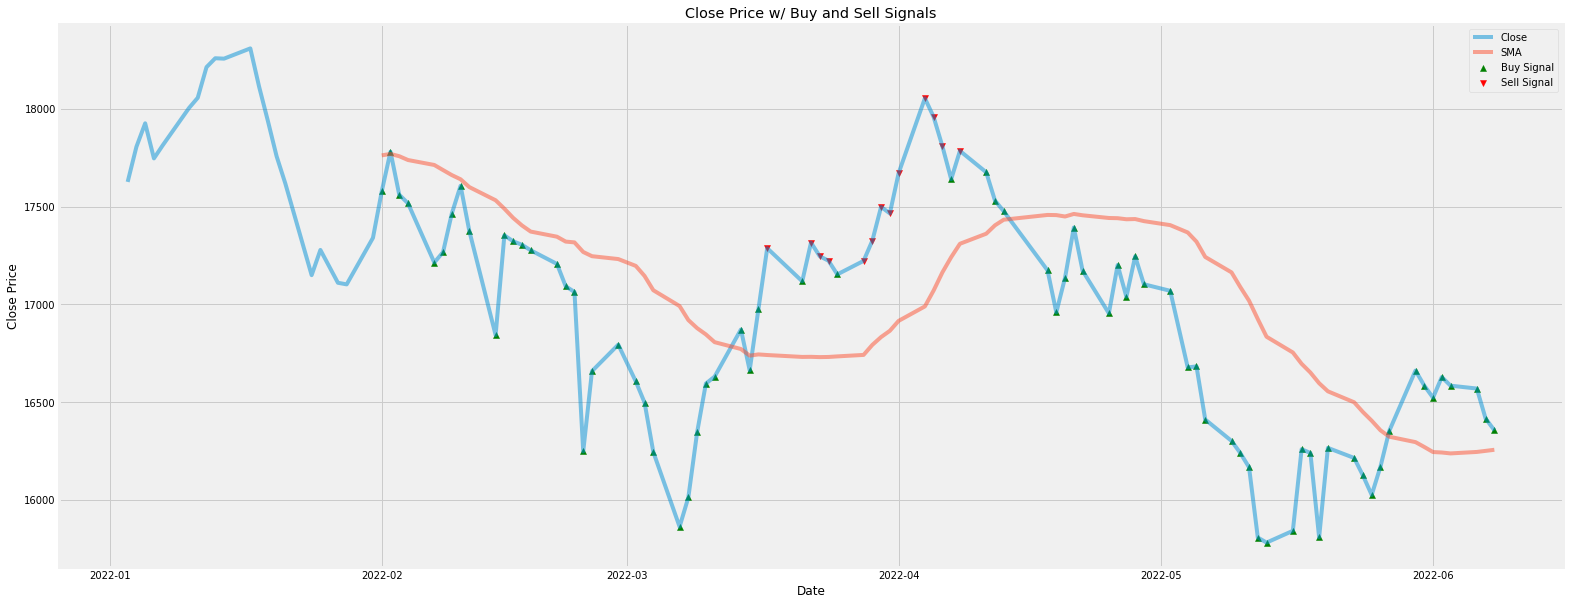

In [ ]:
# Visualize the buy and sell signal along with close price
# plot the ratios
plt.figure(figsize=(24,10))
plt.title('Close Price w/ Buy and Sell Signals')
plt.plot(df['Close'], alpha = 0.5, label= 'Close')
plt.plot(df['SMA'], alpha = 0.5, label= 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker= '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', marker= 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# calculate the return for the MEAN reversion Strategy
df['Strategy_Returns'] = df.Positions.shift(1) * df.Log_Returns
df['Strategy_Returns']

Date
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
                ...   
2022-06-02    0.006350
2022-06-03   -0.002632
2022-06-06   -0.000890
2022-06-07   -0.009289
2022-06-08   -0.003668
Name: Strategy_Returns, Length: 107, dtype: float64

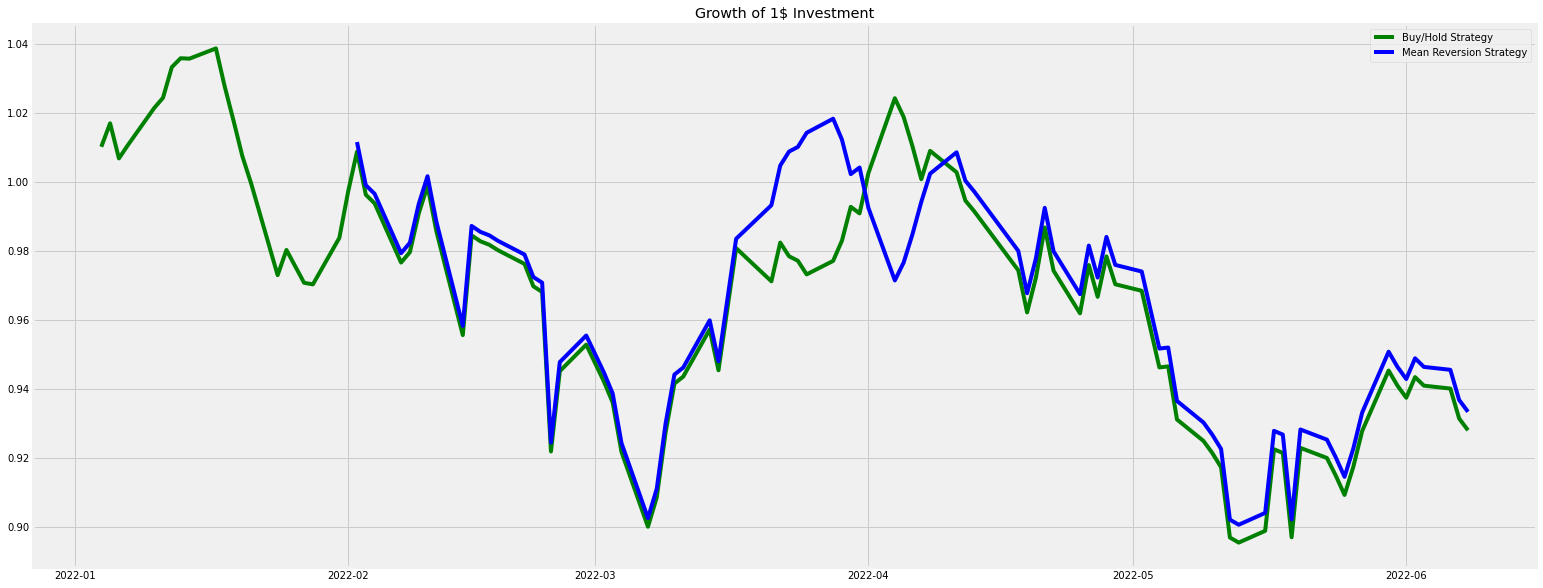

In [ ]:
#plot the cumalative log returns & cumalative MEAN Reversion Strategy
plt.figure(figsize=(24,10))
plt.title('Growth of 1$ Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green', label= 'Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c = 'blue', label= 'Mean Reversion Strategy')
plt.legend()
plt.show()

In [ ]:
#print the retuurns for both strategies
print('Buy & Hold Strategy Retuurn:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
print('Mean Reversion Strategy Retuurn:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] -1)

Buy & Hold Strategy Retuurn: -0.07202263030788436
Mean Reversion Strategy Retuurn: -0.0666587889169531
